In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Section 1

In [2]:
def hard_predictions(x):
    z1 = 2*x[0] + x[1]
    z2 = x[0] + x[1] + 1
    z3 = x[0] + 2*x[1]
    return np.argmax([z1, z2, z3], axis=0)

In [3]:
hard_predictions((0, 0)), hard_predictions((100, 0)),hard_predictions((0, 100))

(1, 0, 2)

In [4]:
h = .02
xx, yy = np.meshgrid(np.arange(-1, 2, h), np.arange(-1, 2, h))
Z = np.array([hard_predictions(x) for x in np.c_[xx.ravel(), yy.ravel()]])

In [5]:
Z = Z.reshape(xx.shape)

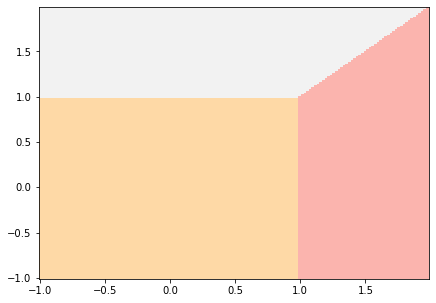

In [6]:
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1, shading='auto')

### Section 2.1

In [7]:
columns = ['state','county','community','communityname','fold','population','householdsize',
           'racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21',
           'agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome',
           'pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire',
           'medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
           'OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade',
           'PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu',
           'PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

In [8]:
df = pd.read_csv("communities.data", header=None, na_values=["?"], names=columns)

In [9]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [10]:
Y = df.iloc[:,-1].values
X = df.iloc[:,5:127]

In [11]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


In [12]:
X.shape

(1994, 122)

### Section 2.2

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,
                                                    random_state=3)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1794, 122), (200, 122), (1794,), (200,))

### Section 2.3

In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [16]:
imp.fit(x_train)

SimpleImputer(strategy='median')

In [17]:
columns = x_train.columns
columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=122)

In [18]:
x_train = pd.DataFrame(imp.transform(x_train))
x_train.columns = columns 

In [19]:
x_test = pd.DataFrame(imp.transform(x_test))
x_test.columns = columns 

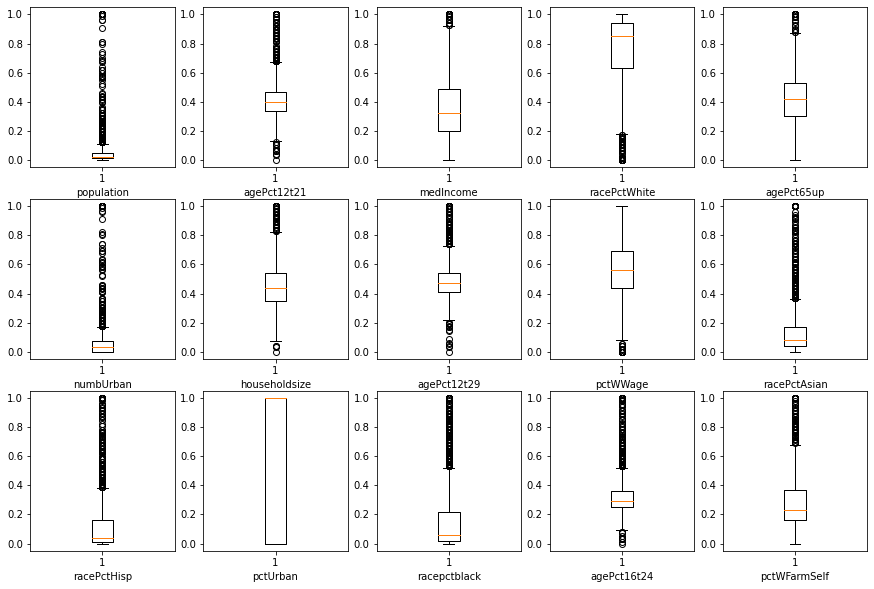

In [20]:
figure, axis = plt.subplots(3, 5, figsize =(15, 10))

for col in range(15):
    i = col % 5
    j = col % 3
    axis[j, i].boxplot(x_train.iloc[:,col])
    axis[j, i].set_xlabel(x_train.columns[col])

In [21]:
# correaltions
correlations = [np.abs(np.corrcoef(y_train, x_train.iloc[:,i])[0][1]) for i in range(x_train.shape[1])]

In [22]:
low_corr = np.argsort(correlations)[:8]
low_corr_names = [columns[i] for i in low_corr]
np.array(low_corr_names)

array(['LemasGangUnitDeploy', 'PctSameState85', 'PctVacMore6Mos',
       'householdsize', 'PctWorkMomYoungKids', 'PersPerOccupHous',
       'PctEmplManu', 'racePctAsian'], dtype='<U19')

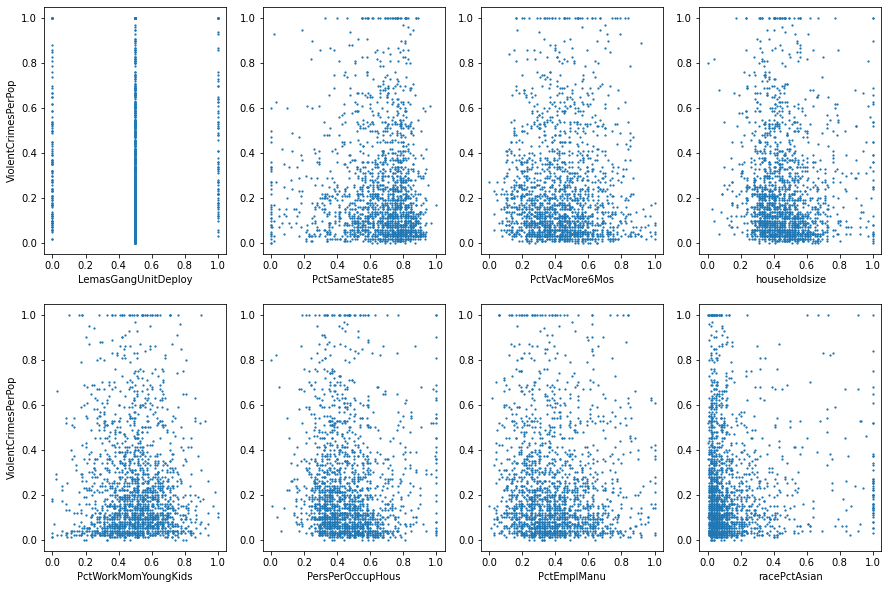

In [23]:
figure, axis = plt.subplots(2, 4, figsize =(15, 10))
count = 0
for col in low_corr:
    i = count % 4
    j = int(count > 3)
    axis[j, i].scatter(x_train.iloc[:,col], y_train, s=1.5)
    axis[j, i].set_xlabel(low_corr_names[count])
    if i == 0:
        axis[j, i].set_ylabel("ViolentCrimesPerPop")
    count += 1

### Section 2.4

In [24]:
cv = KFold(n_splits=10, random_state=3, shuffle=True)

In [25]:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], 
                cv=cv).fit(x_train, y_train)

In [26]:
ridge.alpha_, ridge.best_score_

(10.0, 0.6487274869631167)

### Section 2.5

In [27]:
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], 
                cv=cv).fit(x_train, y_train)

In [28]:
lasso.alpha_

0.001

In [29]:
# this is train r^2
lasso.score(x_train, y_train)

0.6657236840148306

In [30]:
sum(np.abs(lasso.coef_) >0)

22

In [31]:
x_train.shape, y_train.shape

((1794, 122), (1794,))

In [32]:
# more correct way to get cross-validation scores
def get_cross_valid_scores(cv, X, Y, alpha=0.001):
    cv.get_n_splits(X.values)
    pred = []
    ys = []
    for train_index, test_index in cv.split(X.values):
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        reg = Lasso(alpha=alpha).fit(X_train, Y_train)
        pred.append(reg.predict(X_test))
        ys.append(Y_test)
    return r2_score(np.concatenate(ys), np.concatenate(pred))

In [33]:
get_cross_valid_scores(cv, x_train, y_train)

0.6529106937709139

### Section 2.6

In [34]:
max_depth = [int(x) for x in np.linspace(6, 20, num = 10)]
max_features = [x for x in np.linspace(0.1, 1, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(6, 20, num = 10)]

In [35]:
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [36]:
rf = RandomForestRegressor()

In [36]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = cv, verbose=2, random_state=42, n_jobs = -1)

In [37]:
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=3, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 9, 10, 12, 13, 15,
                                                      16, 18, 20],
                                        'max_features': [0.1, 0.2,
                                                         0.30000000000000004,
                                                         0.4, 0.5, 0.6,
                                                         0.7000000000000001,
                                                         0.8, 0.9, 1.0],
                                        'min_samples_leaf': [6, 7, 9, 10, 12,
                                                             13, 15, 16, 18,
                                                             20]},
                   random_state=42, verbose=2)

In [125]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=18, max_features=0.30000000000000004,
                      min_samples_leaf=6)

In [126]:
rf_random.best_score_

0.6624542246676856

### Section 2.8 Confidence intervals

Since the random forest score is close to the lasso score I pick lasso which is a much simpler model

In [37]:
Y = df.iloc[:,-1].values
X = df.iloc[:,5:127]

In [38]:
scores = []
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=i)
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    imp.fit(x_train)
    x_train = imp.transform(x_train)
    x_test = imp.transform(x_test)
    lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], 
                cv=10).fit(x_train, y_train)
    scores.append(lasso.score(x_test, y_test))

In [39]:
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(scores)-1, loc=np.mean(scores),
              scale=st.sem(scores)) 

(0.6453037590324024, 0.6606401793204053)

In [40]:
np.mean(scores)

0.6529719691764039